# Compare accuracy of four CNN architectures

In this example, we compare accuracy of four CNN architectures:

- [AlexNet](https://github.com/BVLC/caffe/tree/master/models/bvlc_alexnet)
- [SqueezeNet 1.0](https://github.com/DeepScale/SqueezeNet/tree/master/SqueezeNet_v1.0)
- [SqueezeNet 1.1](https://github.com/DeepScale/SqueezeNet/tree/master/SqueezeNet_v1.1)
- [GoogleNet](https://github.com/BVLC/caffe/tree/master/models/bvlc_googlenet)

on the [Imagenet validation set](http://academictorrents.com/details/5d6d0df7ed81efd49ca99ea4737e0ae5e3a5f2e5) (50,000 images).

The experimental data is stored in the main CK-Caffe repository under '[experiment](https://github.com/dividiti/ck-caffe/tree/master/experiment)'.

## Includes

### Collective Knowledge

In [1]:
import ck.kernel as ck
print ('CK version: %s' % ck.__version__)

CK version: 1.7.4dev


### Scientific

In [2]:
import IPython as ip
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mp

In [3]:
print ('IPython version: %s' % ip.__version__)
print ('NumPy version: %s' % np.__version__)
print ('SciPy version: %s' % sp.__version__)
print ('Pandas version: %s' % pd.__version__)
print ('Matplotlib version: %s' % mp.__version__)

IPython version: 4.1.1
NumPy version: 1.10.4
SciPy version: 0.17.0
Pandas version: 0.18.0+57.g101d81d.dirty
Matplotlib version: 1.5.1


In [4]:
from matplotlib import cm
%matplotlib inline

## Access experimental results

In [5]:
def get_run_info(tags):
    r=ck.access({'action':'get', 'module_uoa':'experiment', 'tags':tags, 'load_json_files':['0001']})
    if r['return']>0:
        print ("Error: %s" % r['error'])
        exit(1)
    # Assume a single point per the given tags.
    point = r['points'][0]
    characteristics = point['0001']['characteristics_list']
    run_info = characteristics[0]['run']
    return run_info

### AlexNet

In [6]:
alexnet_tags = 'accuracy,caffemodel,bvlc,alexnet'
alexnet_info = get_run_info(alexnet_tags)
alexnet_accuracy = (alexnet_info['accuracy'], alexnet_info['accuracy_top5'])
alexnet_accuracy

(0.568279, 0.799501)

### SqueezeNet 1.0

In [7]:
squeezenet_1_0_tags = 'accuracy,caffemodel,deepscale,squeezenet-1.0'
squeezenet_1_0_info = get_run_info(squeezenet_1_0_tags)
squeezenet_1_0_accuracy = (squeezenet_1_0_info['accuracy'], squeezenet_1_0_info['accuracy_top5'])
squeezenet_1_0_accuracy

(0.576801, 0.803903)

### SqueezeNet 1.1

In [8]:
squeezenet_1_1_tags = 'accuracy,caffemodel,deepscale,squeezenet-1.1'
squeezenet_1_1_info = get_run_info(squeezenet_1_1_tags)
squeezenet_1_1_accuracy = (squeezenet_1_1_info['accuracy'], squeezenet_1_1_info['accuracy_top5'])
squeezenet_1_1_accuracy

(0.58388, 0.810123)

### GoogleNet

In [9]:
googlenet_tags = 'accuracy,caffemodel,bvlc,googlenet'
googlenet_info = get_run_info(googlenet_tags)
googlenet_accuracy = (googlenet_info['loss3/top-1'], googlenet_info['loss3/top-5'])
googlenet_accuracy

(0.689299, 0.891441)

## Data frame

In [10]:
df = pd.DataFrame(
    columns=[['Accuracy, %']*2, ['Top 1', 'Top 5']],
    data=[alexnet_accuracy, squeezenet_1_0_accuracy, squeezenet_1_1_accuracy, googlenet_accuracy], 
    index=['AlexNet', 'SqueezeNet 1.0', 'SqueezeNet 1.1', 'GoogleNet']
)
df

Accuracy, %          
                     Top 1     Top 5
AlexNet           0.568279  0.799501
SqueezeNet 1.0    0.576801  0.803903
SqueezeNet 1.1    0.583880  0.810123
GoogleNet         0.689299  0.891441

## Plot

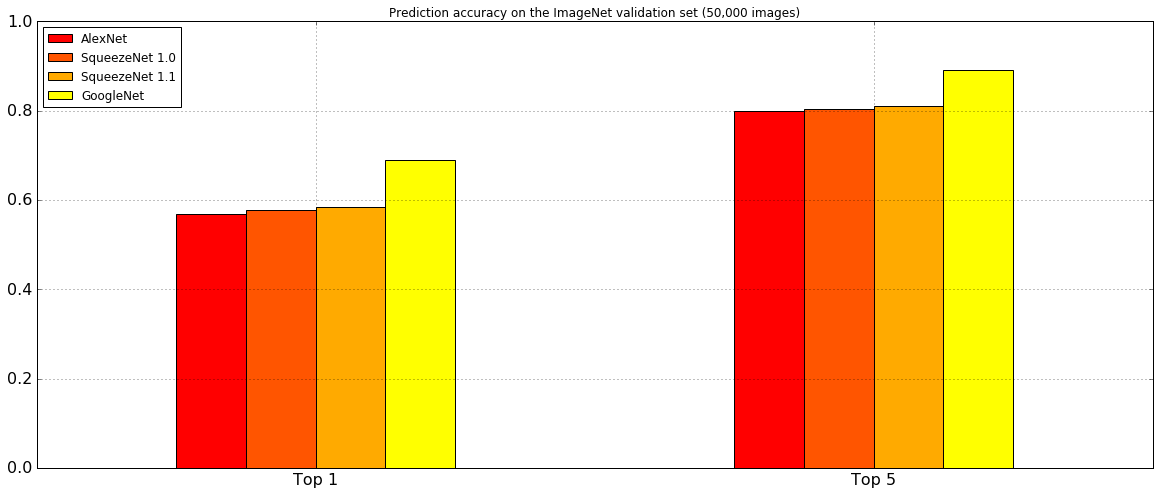

In [11]:
df['Accuracy, %'].T \
    .plot(title='Prediction accuracy on the ImageNet validation set (50,000 images)',
          kind='bar', rot=0, ylim=[0,1], figsize=[20, 8], grid=True, legend=True, colormap=cm.autumn, fontsize=16)